In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

### Scenario
Believe that an asset price process $S = (S_t)_{t \geq 0} $ follows the Black-Scholes model.  
- The asset’s current price is \$ 10.  
- Just sold 10,000 units of an at-the-money 1/4 year (= 63 days) call on this asset, referred to as option g.  
- May trade:
  - **An at-the-money call with maturity 0.3 year** (option **h**).
  - The stock.
  - The bank account.
- Transaction costs:
  - \$ 0.005 per share on equity transactions.  
  - \$ 0.005 per option on option transactions.
- Only integer quantities of stocks and options may be traded.

**Model Parameters:**
- $ \mu = 10% $ (drift).
- $ \sigma = 25% $ (volatility).
- $r = 5% $ (risk-free rate).  

We hedge daily.

In [ ]:
# Parameters
S0 = 10                # Initial asset price
K = 10                 # Strike price
r = 0.05               # Risk-free rate
sigma = 0.25           # Volatility
T = 63 / 252           # Time to maturity (63 trading days)
mu_values = np.arange(0, 1, 0.1).tolist()  # Drift values for comparison
n_paths = 5000         # Number of simulated paths
dt = 1 / 252           # Time step (daily)
n_steps = int(T / dt)  # Number of time steps
transaction_cost = 0.005
num_g = 10000

In [ ]:
print(mu_values)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


# Question 1
Compare the profit and loss distribution assuming you Delta hedge and when you DeltaGamma hedge using 5,000 simulated paths. How do they vary as µ varies?

## Define the Black-Scholes Model
Black-Scholes formula for asset price dynamics:
$ dS_t = \mu S_t dt + \sigma S_t dW_t $
where:
- $S_t$ is the asset price at time t.
- $\mu$ is the drift.
- $\sigma$ is the volatility.
- $dW_t$ is the Wiener process.

---

## Simulate Asset Price Paths
1. Use a discretized form of the Black-Scholes model:
   $ S_{t+\Delta t} = S_t \exp\left((\mu - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} Z_t\right) $  
   where $Z_t$ are standard normal random variables.

2. Generate 5,000 simulated paths for the asset price $S_t$ over the 63-day horizon using different values of $\mu$ (e.g., 5%, 10%, 15%, etc.).


In [ ]:
from scipy.stats import norm
import numpy as np

def bsm_call_price(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes-Merton price of a European call option.
    Parameters:
        S: Initial stock price.
        K: Strike price.
        T: Time to maturity (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
    Returns:
        Call option price.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [ ]:
# Simulate asset price paths
np.random.seed(0)
def simulate_asset_paths(S0, mu, sigma, T, dt, n_steps, n_paths):
    Z = np.random.normal(0, 1, (n_steps, n_paths))
    S = np.zeros((n_steps + 1, n_paths))
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((mu - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * Z[t - 1])
    S_df = pd.DataFrame(S, columns=[f'Path {i}' for i in range(1, n_paths + 1)])
    time_df = pd.DataFrame(list(S_df.index), columns=['Time Step'])
    time_df["Time Stamp"] = time_df['Time Step'] * dt
    time_df["Time to Maturity"] = T - time_df["Time Stamp"]
    return S_df, time_df

sim_path_df, time_df = simulate_asset_paths(S0, mu_values[1], sigma, T, dt, n_steps, n_paths)
sim_path_df.head()

,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,Path 10,...,Path 4991,Path 4992,Path 4993,Path 4994,Path 4995,Path 4996,Path 4997,Path 4998,Path 4999,Path 5000
0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,10.284513,10.065964,10.158102,10.362035,10.301291,9.849958,10.153520,9.978914,9.986482,10.067619,...,9.912814,10.069885,9.960089,9.895625,9.763447,9.986772,10.121044,10.150177,10.038934,10.068223
2,10.337620,9.952450,9.917890,10.273490,10.047784,9.981396,10.562716,10.141970,9.945062,10.073016,...,9.876415,9.921064,10.040523,10.236481,9.918614,9.708878,10.130561,10.235929,10.036468,10.278973
3,10.307579,9.825386,10.195176,10.307194,10.022421,9.814965,10.728620,10.376033,9.909455,9.977351,...,10.007435,10.227877,9.847777,10.259874,10.111031,9.808120,10.431073,10.360877,9.947763,10.249705
4,10.719353,9.919345,10.134341,10.380641,10.104455,10.010749,10.560667,10.301965,9.934506,9.876197,...,10.274137,10.561052,9.860858,10.714616,9.953723,9.852859,10.416025,10.354363,9.785913,10.199916


In [ ]:
time_df

,Time Step,Time Stamp,Time to Maturity
0,0,0.000000,0.250000
1,1,0.003968,0.246032
2,2,0.007937,0.242063
3,3,0.011905,0.238095
4,4,0.015873,0.234127
...,...,...,...
59,59,0.234127,0.015873
60,60,0.238095,0.011905
61,61,0.242063,0.007937
62,62,0.246032,0.003968


## Implement Delta and Delta-Gamma Hedging
1. **Delta Hedging**:
   - Delta $ \Delta $ of the sold option g using the Black-Scholes formula:  
     $ \Delta = \Phi (d_1) $  
     where:  $ d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{(T-t)}} $
     

2. **Delta-Gamma Hedging**:
   - Need both Delta $ \Delta $ and Gamma $ \Gamma $:  
     $ \Gamma = \frac{\phi(d_1)}{S\sigma\sqrt{(T-t)}} $
   - Use the second traded **option h** to hedge Gamma.
   - Solve for the required positions in h and the stock to hedge both Delta and Gamma.

3. **Account for transaction costs for both Delta and Delta-Gamma hedging**:
   - \$ 0.005 per share on equity transactions.
   - \$ 0.005 per option on option transactions.

In [ ]:
# Black-Scholes formulas for Delta and Gamma
def black_scholes_d1(S, T_vec, K, r, sigma):
    """
    Calculate d1 for Black-Scholes model using vectorized operations.
    S: DataFrame of asset prices (n_steps x n_paths)
    T: Time-to-maturity vector (n_steps x 1)
    K: Strike price (scalar)
    r: Risk-free rate (scalar)
    sigma: Volatility (scalar)
    """
    d1 = S.copy()
    T_array = T_vec.to_numpy()  # Ensure T is a NumPy array
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T_array) / (sigma * np.sqrt(T_array))
    return d1

def black_scholes_delta(S, T_vec, K, r, sigma):
    """
    Calculate Delta for Black-Scholes model and return as a DataFrame.
    S: DataFrame of asset prices (n_steps x n_paths)
    T: DataFrame of time-to-maturity (n_steps x 1)
    K: Strike price (scalar)
    r: Risk-free rate (scalar)
    sigma: Volatility (scalar)
    """
    d1 = black_scholes_d1(S, T_vec, K, r, sigma)
    delta_array = norm.cdf(d1)  # Calculate Delta as a NumPy array
    delta_df = pd.DataFrame(delta_array, index=S.index, columns=S.columns)  # Convert back to DataFrame
    return delta_df

def black_scholes_gamma(S, T_vec, K, r, sigma):
    """
    Calculate Gamma for Black-Scholes model using vectorized operations.
    S: DataFrame of asset prices (n_steps x n_paths)
    T: DataFrame of time-to-maturity (n_steps x 1)
    K: Strike price (scalar)
    r: Risk-free rate (scalar)
    sigma: Volatility (scalar)
    """
    d1 = black_scholes_d1(S, T_vec, K, r, sigma)
    T_array = T_vec.to_numpy()  # Ensure T is a NumPy array
    return norm.pdf(d1) / (S * sigma * np.sqrt(T_array))

## Delta Hedging (at each time step)

$N_s \Delta S + N_B \Delta B + N_g \Delta g = 0$ \\
$N_s(1) + N_B(0) - 10000*N_g = 0$ \\
$N_s = 10000 \Delta g$

## Delta - Gamma Hedging (at each time step)
$N_s(0) + N_B(0) - 10000 \cdot Γ^g + N_h \cdot Γ^h = 0$ \\
$N_h \cdot Γ^h = 10000 \cdot Γ^g$ \\
$N_h = 10000 \cdot \frac{Γ^g}{Γ^h}$ \\

$N_s \Delta S + N_B \Delta B + N_g \Delta g + N_h \Delta h = 0$ \\
$N_s(1) + 0 - 10000 \Delta g + N_h \Delta h = 0$ \\
$N_s = 10000 \Delta g - N_h \Delta h$ \\
$\implies N_s = 10000 \Delta g - 10000 \cdot \frac{Γ^g}{Γ^h} \Delta h$


In [ ]:
def delta_hedging(delta_g, num_g):
    """
    Delta hedging to calculate the number of shares (N_s) at each time step.
    Parameters:
        delta_g: Array of g Delta values for each time step.
        num_g: Number of g options sold.
    Returns:
        ns_shares: Array of number of shares at each time step.
    """
    ns_shares = num_g * delta_g
    return ns_shares

def delta_gamma_hedging(delta_g, gammas_g, gammas_h, delta_h, num_g):
    """
    Delta-Gamma hedging to calculate the number of shares (N_s) at each time step.
    Parameters:
        delta_g: Array of Delta values for option g.
        gammas_g: Array of Gamma values for option g.
        gammas_h: Array of Gamma values for hedging instrument h.
        delta_h: Array of Delta values for hedging instrument h.
        num_g: Number of g options sold.
    Returns:
        ns_shares: Array of number of shares at each time step.
        num_h: Array of number of units of hedging instrument h at each time step.
    """
    num_h = num_g * (gammas_g / gammas_h)
    ns_shares = num_g * delta_g - num_h * delta_h
    return ns_shares, num_h


## delta_hedging_rebalance function

In [ ]:
# def delta_hedging_rebalance(
#     S, K, T, r, sigma, delta_g, num_g, transaction_cost
# ):
#     """
#     Delta Hedging: Rebalance portfolio daily using only Delta hedging.
#     Parameters:
#         S: DataFrame of simulated stock prices (n_steps x n_paths).
#         K: Strike price of the g option.
#         T: Time to maturity of the g option (in years).
#         r: Risk-free interest rate.
#         sigma: Volatility of the underlying asset.
#         delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
#         num_g: Number of g options sold.
#         transaction_cost: Cost per unit for stock transactions.
#     Returns:
#         pnl: Array of P&L values for each path.
#     """
#     n_steps, n_paths = S.shape
#     dt = 1 / 252  # Daily time step
#     pnl = np.zeros(n_paths)

#     for i in range(n_paths):
#         # Calculate initial value of the g option using BSM
#         S_0 = S.iloc[0, i]
#         g_option_value = bsm_call_price(S_0, K, T, r, sigma)

#         # Initial portfolio setup
#         N_s_0 = int(delta_hedging(delta_g.iloc[0, i], num_g))
#         bank = num_g * g_option_value - N_s_0 * S_0
#         stock_position = N_s_0

#         for t in range(1, n_steps-1):
#             S_t = S.iloc[t - 1, i]
#             S_next = S.iloc[t, i]
#             time_step = dt

#             # Accumulate interest
#             bank *= np.exp(r * dt)

#             # Rebalance
#             N_s_new = int(delta_hedging(delta_g.iloc[t, i], num_g))
#             stock_change = stock_position - N_s_new
#             bank += stock_change * S_next - abs(stock_change) * transaction_cost
#             stock_position = N_s_new

#         # Final portfolio value
#         final_stock_value = stock_position * S.iloc[-1, i]
#         final_option_payoff = num_g * max(S.iloc[-1, i] - K, 0)  # Option payoff

#         # Accumulate final interest for the bank balance
#         bank *= np.exp(r * dt)

#         pnl[i] = bank + final_stock_value - final_option_payoff

#     return pnl


In [ ]:
def delta_hedging_rebalance(
    S, K, T, r, sigma, delta_g, num_g, transaction_cost
):
    """
    Delta Hedging: Rebalance portfolio daily using only Delta hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K: Strike price of the g option.
        T: Time to maturity of the g option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock transactions.
    Returns:
        pnl: Array of P&L values for each path.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step

    # Initial value of the g option using BSM for all paths
    S_0 = S.iloc[0, :].values
    g_option_value = bsm_call_price(S_0, K, T, r, sigma)

    # Initial portfolio setup
    N_s_0 = np.floor(delta_hedging(delta_g.iloc[0, :].values, num_g)).astype(int)
    bank = num_g * g_option_value - N_s_0 * S_0 - np.abs(N_s_0) * transaction_cost
    stock_position = N_s_0

    # Rebalance over time
    for t in range(1, n_steps - 1):
        S_t = S.iloc[t - 1, :].values
        S_next = S.iloc[t, :].values

        # Accumulate interest in the bank
        bank *= np.exp(r * dt)

        # Rebalance
        N_s_new = np.floor(delta_hedging(delta_g.iloc[t, :].values, num_g)).astype(int)
        stock_change = stock_position - N_s_new
        bank += stock_change * S_next - np.abs(stock_change) * transaction_cost
        stock_position = N_s_new

    # Final portfolio values
    final_stock_value = stock_position * S.iloc[-1, :].values
    final_option_payoff = num_g * np.maximum(S.iloc[-1, :].values - K, 0)

    # Accumulate final interest for the bank balance
    bank *= np.exp(r * dt)

    # Calculate P&L for each path
    pnl = bank + final_stock_value - final_option_payoff - np.abs(stock_position) * transaction_cost

    return pnl


## PnL Plot for Delta Hedging

In [ ]:
import matplotlib.pyplot as plt

# Prepare to store PnL distributions for each mu
pnl_results_delta = {}

# Loop over all mu values
for mu in mu_values:
    # Simulate asset paths for the current mu
    sim_path_df, time_df = simulate_asset_paths(S0, mu, sigma, T, dt, n_steps, n_paths)

    # Create T_vec_g
    T_vec_g = time_df["Time to Maturity"]
    T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)

    # Compute deltas for g options
    deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K, r, sigma)

    # Perform delta hedging and compute PnL
    pnl_delta = delta_hedging_rebalance(
        S=sim_path_df,
        K=K,
        T=T,
        r=r,
        sigma=sigma,
        delta_g=deltas_g,
        num_g=num_g,
        transaction_cost=transaction_cost
    )

    # Store results for plotting
    pnl_results_delta[mu] = pnl_delta




In [ ]:
# # Plot PnL distributions for all mu values
# plt.figure(figsize=(10, 6))
# for mu, pnl in pnl_results_delta.items():
#     plt.hist(pnl, bins=50, alpha=0.6, label=f"mu={mu:.2f}")

# plt.xlabel("P&L")
# plt.ylabel("Frequency")
# plt.title("P&L Distributions for Delta Hedging Across Different mu Values")
# plt.legend()
# plt.show()

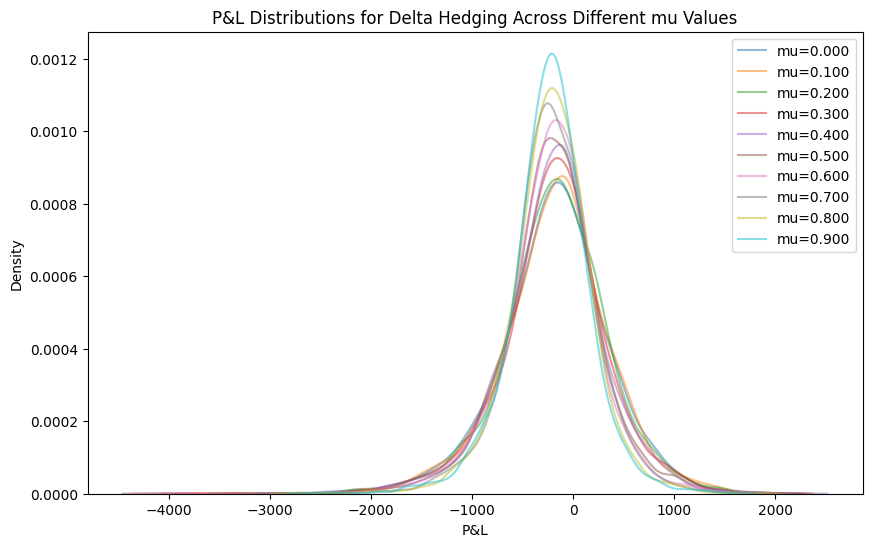

In [ ]:
import seaborn as sns
# Plot PnL distributions for all mu values using KDE
plt.figure(figsize=(10, 6))
for mu, pnl in pnl_results_delta.items():
    sns.kdeplot(pnl, label=f"mu={mu:.3f}", fill=False, alpha=0.5)

plt.xlabel("P&L")
plt.ylabel("Density")
plt.title("P&L Distributions for Delta Hedging Across Different mu Values")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis

# Prepare to store summary statistics for each mu
summary_stats = []

# Loop over each mu and calculate summary statistics
for mu, pnl in pnl_results_delta.items():
    stats = {
        'mu': mu,
        'mean': pnl.mean(),
        'variance': pnl.var(),
        'skewness': skew(pnl),
        'kurtosis': kurtosis(pnl),
        'min': pnl.min(),
        'max': pnl.max(),
        'std': pnl.std()
    }
    summary_stats.append(stats)

# Convert to a DataFrame for a clean display
summary_stats_df_delta = pd.DataFrame(summary_stats)
summary_stats_df_delta

,mu,mean,variance,skewness,kurtosis,min,max,std
0,0.0,-183.270378,301655.256337,-0.284111,1.171408,-2819.748090,1929.385197,549.231514
1,0.1,-173.759230,302721.627544,-0.331630,1.693659,-3641.291890,2018.412645,550.201443
2,0.2,-175.302218,284520.603779,-0.323901,1.466275,-3303.960928,1714.468449,533.404728
3,0.3,-185.974778,279040.815425,-0.373186,2.127513,-3774.819496,1983.221454,528.243140
4,0.4,-195.901329,266937.124436,-0.289489,1.856252,-2763.890616,2233.138463,516.659583
5,0.5,-211.911303,241885.628416,-0.440957,3.265738,-4187.323990,2095.296252,491.818695
6,0.6,-221.507765,228145.776609,-0.532274,3.447554,-4109.778959,1911.990398,477.646079
7,0.7,-203.731115,190565.615687,-0.232570,2.439862,-2892.350413,1944.180760,436.538218
8,0.8,-216.524319,176069.702220,-0.394103,2.833758,-2747.952187,1806.648308,419.606604
9,0.9,-229.010590,163292.866546,-0.337420,2.539639,-2611.953028,1589.032561,404.095121


## delta_gamma_hedging_rebalance function

In [ ]:
# def delta_gamma_hedging_rebalance(
#     S, K_g, T_g, K_h, T_h, r, sigma, delta_g, gamma_g, gamma_h, delta_h, num_g, transaction_cost
# ):
#     """
#     Delta-Gamma Hedging: Rebalance portfolio daily using Delta-Gamma hedging.
#     Parameters:
#         S: DataFrame of simulated stock prices (n_steps x n_paths).
#         K_g: Strike price of the g option.
#         T_g: Time to maturity of the g option (in years).
#         K_h: Strike price of the h option.
#         T_h: Time to maturity of the h option (in years).
#         r: Risk-free interest rate.
#         sigma: Volatility of the underlying asset.
#         delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
#         gamma_g: DataFrame of Gamma values for option g (n_steps x n_paths).
#         gamma_h: DataFrame of Gamma values for hedging instrument h (n_steps x n_paths).
#         delta_h: DataFrame of Delta values for hedging instrument h (n_steps x n_paths).
#         num_g: Number of g options sold.
#         transaction_cost: Cost per unit for stock and option transactions.
#     Returns:
#         pnl: Array of P&L values for each path.
#     """
#     n_steps, n_paths = S.shape
#     dt = 1 / 252  # Daily time step
#     pnl = np.zeros(n_paths)

#     for i in range(n_paths):
#         # Calculate initial value of g and h options using BSM
#         S_0 = S.iloc[0, i]
#         g_option_value = bsm_call_price(S_0, K_g, T_g, r, sigma)
#         h_option_value = bsm_call_price(S_0, K_h, T_h, r, sigma)

#         # Initial portfolio setup
#         N_s_0, N_h_0 = delta_gamma_hedging(
#             delta_g.iloc[0, i], gamma_g.iloc[0, i], gamma_h.iloc[0, i], delta_h.iloc[0, i], num_g
#         )
#         N_s_0 = int(N_s_0)
#         N_h_0 = int(N_h_0)

#         # Initial bank value
#         bank = num_g * g_option_value - N_s_0 * S_0 - N_h_0 * h_option_value - N_s_0 * transaction_cost - N_h_0 * transaction_cost
#         stock_position = N_s_0
#         hedge_position = N_h_0

#         # Rebalance for all steps except the final one
#         for t in range(1, n_steps - 1):
#             S_t = S.iloc[t - 1, i]
#             S_next = S.iloc[t, i]

#             T_h_t = T_h - t * dt  # Update time to maturity for h option

#             # Recalculate h option value at the new time step
#             h_option_value = bsm_call_price(S_next, K_h, T_h_t, r, sigma)

#             # Accumulate interest
#             bank *= np.exp(r * dt)

#             # Rebalance
#             N_s_new, N_h_new = delta_gamma_hedging(
#                 delta_g.iloc[t, i], gamma_g.iloc[t, i], gamma_h.iloc[t, i], delta_h.iloc[t, i], num_g
#             )
#             N_s_new = int(N_s_new)
#             N_h_new = int(N_h_new)

#             # Update bank for stock transactions
#             stock_change = stock_position - N_s_new
#             bank += stock_change * S_next - abs(stock_change) * transaction_cost
#             stock_position = N_s_new

#             # Update bank for hedging instrument transactions
#             hedge_change = hedge_position - N_h_new
#             bank += hedge_change * h_option_value - abs(hedge_change) * transaction_cost
#             hedge_position = N_h_new

#         # Final step: Compute portfolio value without rebalancing
#         S_T = S.iloc[-1, i]  # Final stock price
#         final_stock_value = stock_position * S_T
#         T_h_t = T_h - T_g
#         final_h_option_value = hedge_position * bsm_call_price(S_T, K_h, T_h_t, r, sigma)  # value for h option
#         final_option_payoff = num_g * max(S_T - K_g, 0)  # Payoff for g option

#         # Accumulate final interest for the bank balance
#         bank *= np.exp(r * dt)

#         # Compute the total P&L
#         pnl[i] = bank + final_stock_value + final_h_option_value - final_option_payoff

#     return pnl


In [ ]:
import numpy as np

def delta_gamma_hedging_rebalance(
    S, K_g, T_g, K_h, T_h, r, sigma, delta_g, gamma_g, gamma_h, delta_h, num_g, transaction_cost
):
    """
    Vectorized Delta-Gamma Hedging: Rebalance portfolio daily using Delta-Gamma hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K_g: Strike price of the g option.
        T_g: Time to maturity of the g option (in years).
        K_h: Strike price of the h option.
        T_h: Time to maturity of the h option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        gamma_g: DataFrame of Gamma values for option g (n_steps x n_paths).
        gamma_h: DataFrame of Gamma values for hedging instrument h (n_steps x n_paths).
        delta_h: DataFrame of Delta values for hedging instrument h (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock and option transactions.
    Returns:
        pnl: Array of P&L values for each path.
    """
    # Dimensions and constants
    n_steps, n_paths = S.shape
    dt = 1 / 252

    # Initial values
    S_0 = S.iloc[0, :]
    g_option_value = bsm_call_price(S_0, K_g, T_g, r, sigma)
    h_option_value = bsm_call_price(S_0, K_h, T_h, r, sigma)

    # Initial portfolio setup
    N_s_0, N_h_0 = delta_gamma_hedging(delta_g.iloc[0, :], gamma_g.iloc[0, :], gamma_h.iloc[0, :], delta_h.iloc[0, :], num_g)
    N_s_0 = N_s_0.astype(int)
    N_h_0 = N_h_0.astype(int)
    bank = num_g * g_option_value - N_s_0 * S_0 - N_h_0 * h_option_value - np.abs(N_s_0) * transaction_cost - np.abs(N_h_0) * transaction_cost
    stock_positions = N_s_0
    hedge_positions = N_h_0

    # Create arrays to track portfolio balances
    pnl = np.zeros(n_paths)

    # Vectorized rebalance through time steps
    for t in range(1, n_steps - 1):
        T_h_t = T_h - t * dt  # Update time to maturity for h option
        S_t = S.iloc[t - 1, :]
        S_next = S.iloc[t, :]

        # Update h option value
        h_option_value = bsm_call_price(S_next, K_h, T_h_t, r, sigma)

        # Accumulate interest
        bank *= np.exp(r * dt)

        # Rebalance
        N_s_new, N_h_new = delta_gamma_hedging(delta_g.iloc[t, :], gamma_g.iloc[t, :], gamma_h.iloc[t, :], delta_h.iloc[t, :], num_g)
        N_s_new = N_s_new.astype(int)
        N_h_new = N_h_new.astype(int)

        # Update bank for stock and hedging instrument transactions
        stock_changes = stock_positions - N_s_new
        bank += stock_changes * S_next - abs(stock_changes) * transaction_cost
        stock_positions = N_s_new

        hedge_changes = hedge_positions - N_h_new
        bank += hedge_changes * h_option_value - abs(hedge_changes) * transaction_cost
        hedge_positions = N_h_new

    # Final step
    S_T = S.iloc[-1, :]  # Final stock price
    final_stock_value = stock_positions * S_T
    T_h_t = T_h - T_g
    final_h_option_value = hedge_positions * bsm_call_price(S_T, K_h, T_h_t, r, sigma)
    final_option_payoff = num_g * np.maximum(S_T - K_g, 0)

    # Accumulate final interest
    bank *= np.exp(r * dt)

    # Compute final P&L
    pnl = bank + final_stock_value + final_h_option_value - final_option_payoff - np.abs(stock_positions) * transaction_cost - np.abs(hedge_positions) * transaction_cost

    return pnl


## PnL Plot for Delta-Gamma Hedging

In [ ]:
# Define parameters
K_g = K_h = K       # Strike price for g, h option
T_g = 63/252 # Time to maturity for g option (63 days)
T_h = 0.3      # Time to maturity for h option (in years)

In [ ]:
import matplotlib.pyplot as plt

# Prepare to store PnL distributions for each mu
pnl_results = {}

# Loop over all mu values
for mu in mu_values:
    # Simulate asset paths for the current mu
    sim_path_df, time_df = simulate_asset_paths(S0, mu, sigma, T, dt, n_steps, n_paths)

    # Create T_vec_g and broadcast to match sim_path_df
    T_vec_g = time_df["Time to Maturity"]
    T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)

    # Create T_vec_h for the h option and broadcast to match sim_path_df
    T_vec_h = T_h - np.arange(n_steps + 1) * dt  # Ensure 64 steps
    T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))  # Broadcast to match (64, 5000)
    T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)

    # Compute deltas and gammas for g and h options
    deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K_g, r, sigma)
    deltas_h = black_scholes_delta(sim_path_df, T_vec_h, K_h, r, sigma)

    gammas_g = black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, sigma)
    gammas_h = black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, sigma)

    # Perform delta-gamma hedging and compute PnL
    pnl_delta_gamma = delta_gamma_hedging_rebalance(
        S=sim_path_df,
        K_g=K_g,
        T_g=T_g,
        K_h=K_h,
        T_h=T_h,
        r=r,
        sigma=sigma,
        delta_g=deltas_g,
        gamma_g=gammas_g,
        gamma_h=gammas_h,
        delta_h=deltas_h,
        num_g=num_g,
        transaction_cost=transaction_cost
    )

    # Store results for plotting
    pnl_results[mu] = pnl_delta_gamma




In [ ]:
# # Plot PnL distributions for all mu values
# plt.figure(figsize=(10, 6))
# for mu, pnl in pnl_results.items():
#     plt.hist(pnl, bins=50, alpha=0.6, label=f"mu={mu:.2f}")

# plt.xlabel("P&L")
# plt.ylabel("Frequency")
# plt.title("P&L Distributions for Delta-Gamma Hedging Across Different mu Values")
# plt.legend()
# plt.show()

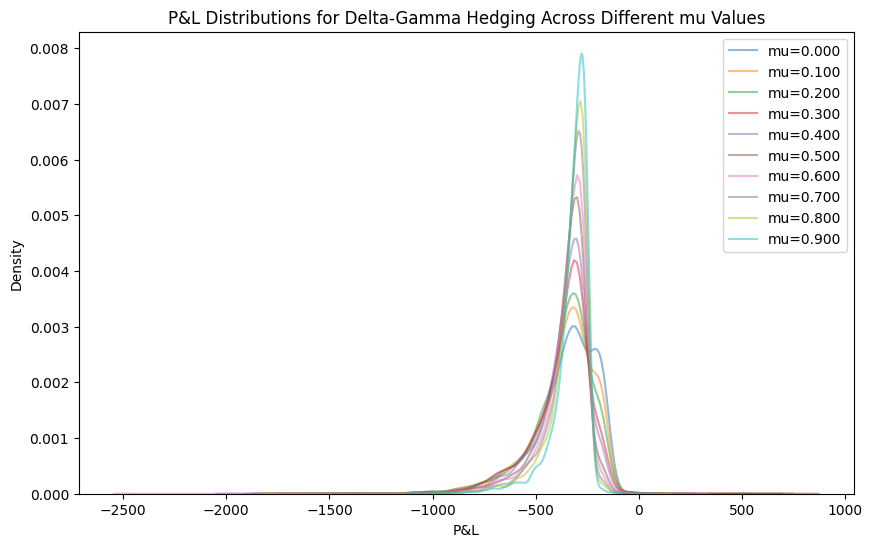

In [ ]:
import seaborn as sns
# Plot PnL distributions for all mu values using KDE
plt.figure(figsize=(10, 6))
for mu, pnl in pnl_results.items():
    sns.kdeplot(pnl, label=f"mu={mu:.3f}", fill=False, alpha=0.5)

plt.xlabel("P&L")
plt.ylabel("Density")
plt.title("P&L Distributions for Delta-Gamma Hedging Across Different mu Values")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Prepare to store summary statistics for each mu
summary_stats = []

# Loop over each mu and calculate summary statistics
for mu, pnl in pnl_results.items():
    stats = {
        'mu': mu,
        'mean': pnl.mean(),
        'variance': pnl.var(),
        'skewness': skew(pnl),
        'kurtosis': kurtosis(pnl),
        'min': pnl.min(),
        'max': pnl.max(),
        'std': pnl.std()
    }
    summary_stats.append(stats)

# Convert to a DataFrame for a clean display
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,mu,mean,variance,skewness,kurtosis,min,max,std
0,0.0,-354.275779,25422.037119,-1.318683,3.020790,-1549.008685,178.973930,159.442896
1,0.1,-363.133248,25252.418620,-1.477712,5.489893,-1769.645377,447.142566,158.910096
2,0.2,-367.862977,23706.229668,-1.419613,5.509478,-1821.115027,661.800265,153.968275
3,0.3,-372.766075,22926.101287,-1.816323,9.054397,-1787.650502,787.273460,151.413676
4,0.4,-366.687792,18982.471325,-2.031136,9.593596,-1974.298500,34.092139,137.776890
5,0.5,-361.904378,16126.720158,-1.824117,8.171400,-1675.610439,622.401731,126.991024
6,0.6,-355.874314,14808.520161,-2.775607,23.444338,-2477.255125,270.190890,121.690263
7,0.7,-345.775087,11607.174440,-2.335910,9.927638,-1422.678178,57.463531,107.736597
8,0.8,-337.860632,10522.102454,-2.807696,16.301986,-1786.797240,103.680067,102.577300
9,0.9,-326.672847,8376.269286,-2.655671,10.878713,-1064.036606,13.834892,91.521961


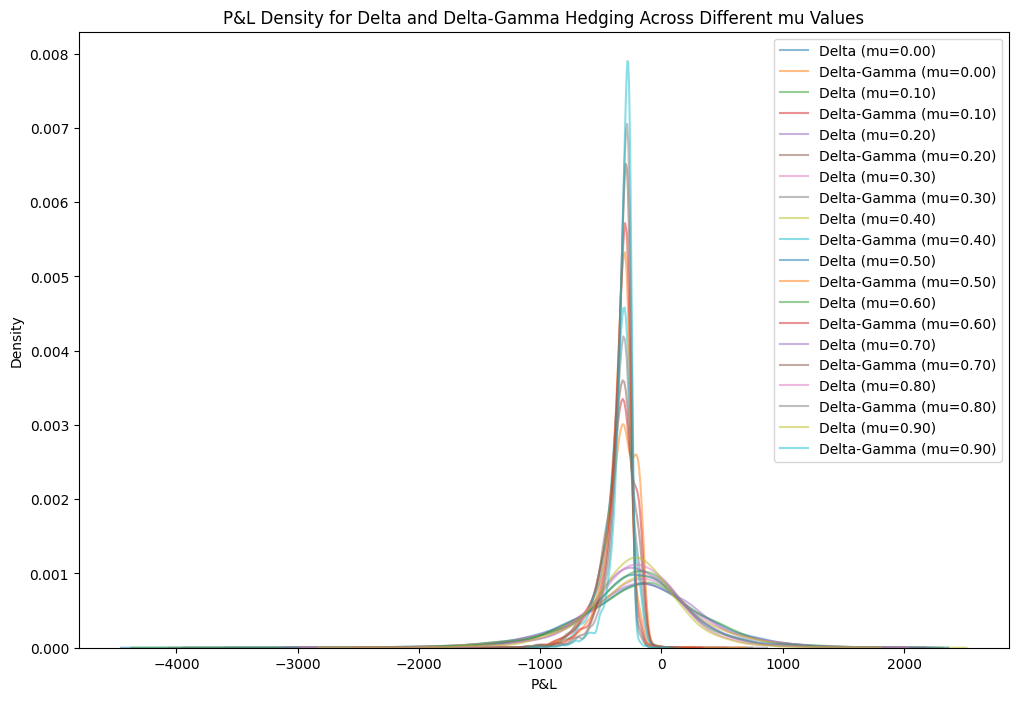

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Delta and Delta-Gamma PnL distributions for each mu value
plt.figure(figsize=(12, 8))

for mu in pnl_results_delta.keys():  # Loop through each mu value
    # Use KDE for density plot
    sns.kdeplot(pnl_results_delta[mu], label=f"Delta (mu={mu:.2f})", fill=False, alpha=0.5)
    sns.kdeplot(pnl_results[mu], label=f"Delta-Gamma (mu={mu:.2f})", fill=False, alpha=0.5)

plt.xlabel("P&L")
plt.ylabel("Density")
plt.title("P&L Density for Delta and Delta-Gamma Hedging Across Different mu Values")
plt.legend()
plt.show()


In [ ]:
# plt.figure(figsize=(14, 12))

# # Create a subplot for each mu value
# for idx, mu in enumerate(pnl_results_delta.keys()):
#     plt.subplot(len(pnl_results_delta), 1, idx + 1)
#     plt.hist(pnl_results_delta[mu], bins=50, alpha=0.5, label="Delta Hedging", color='blue')
#     plt.hist(pnl_results[mu], bins=50, alpha=0.5, label="Delta-Gamma Hedging", color='orange')
#     plt.title(f"P&L Distributions for Delta and Delta-Gamma Hedging for mu={mu:.2f}")
#     plt.xlabel("P&L")
#     plt.ylabel("Frequency")
#     plt.xlim(-4000, 2000)  # Set x-axis limits
#     plt.legend()

# plt.tight_layout()
# plt.show()


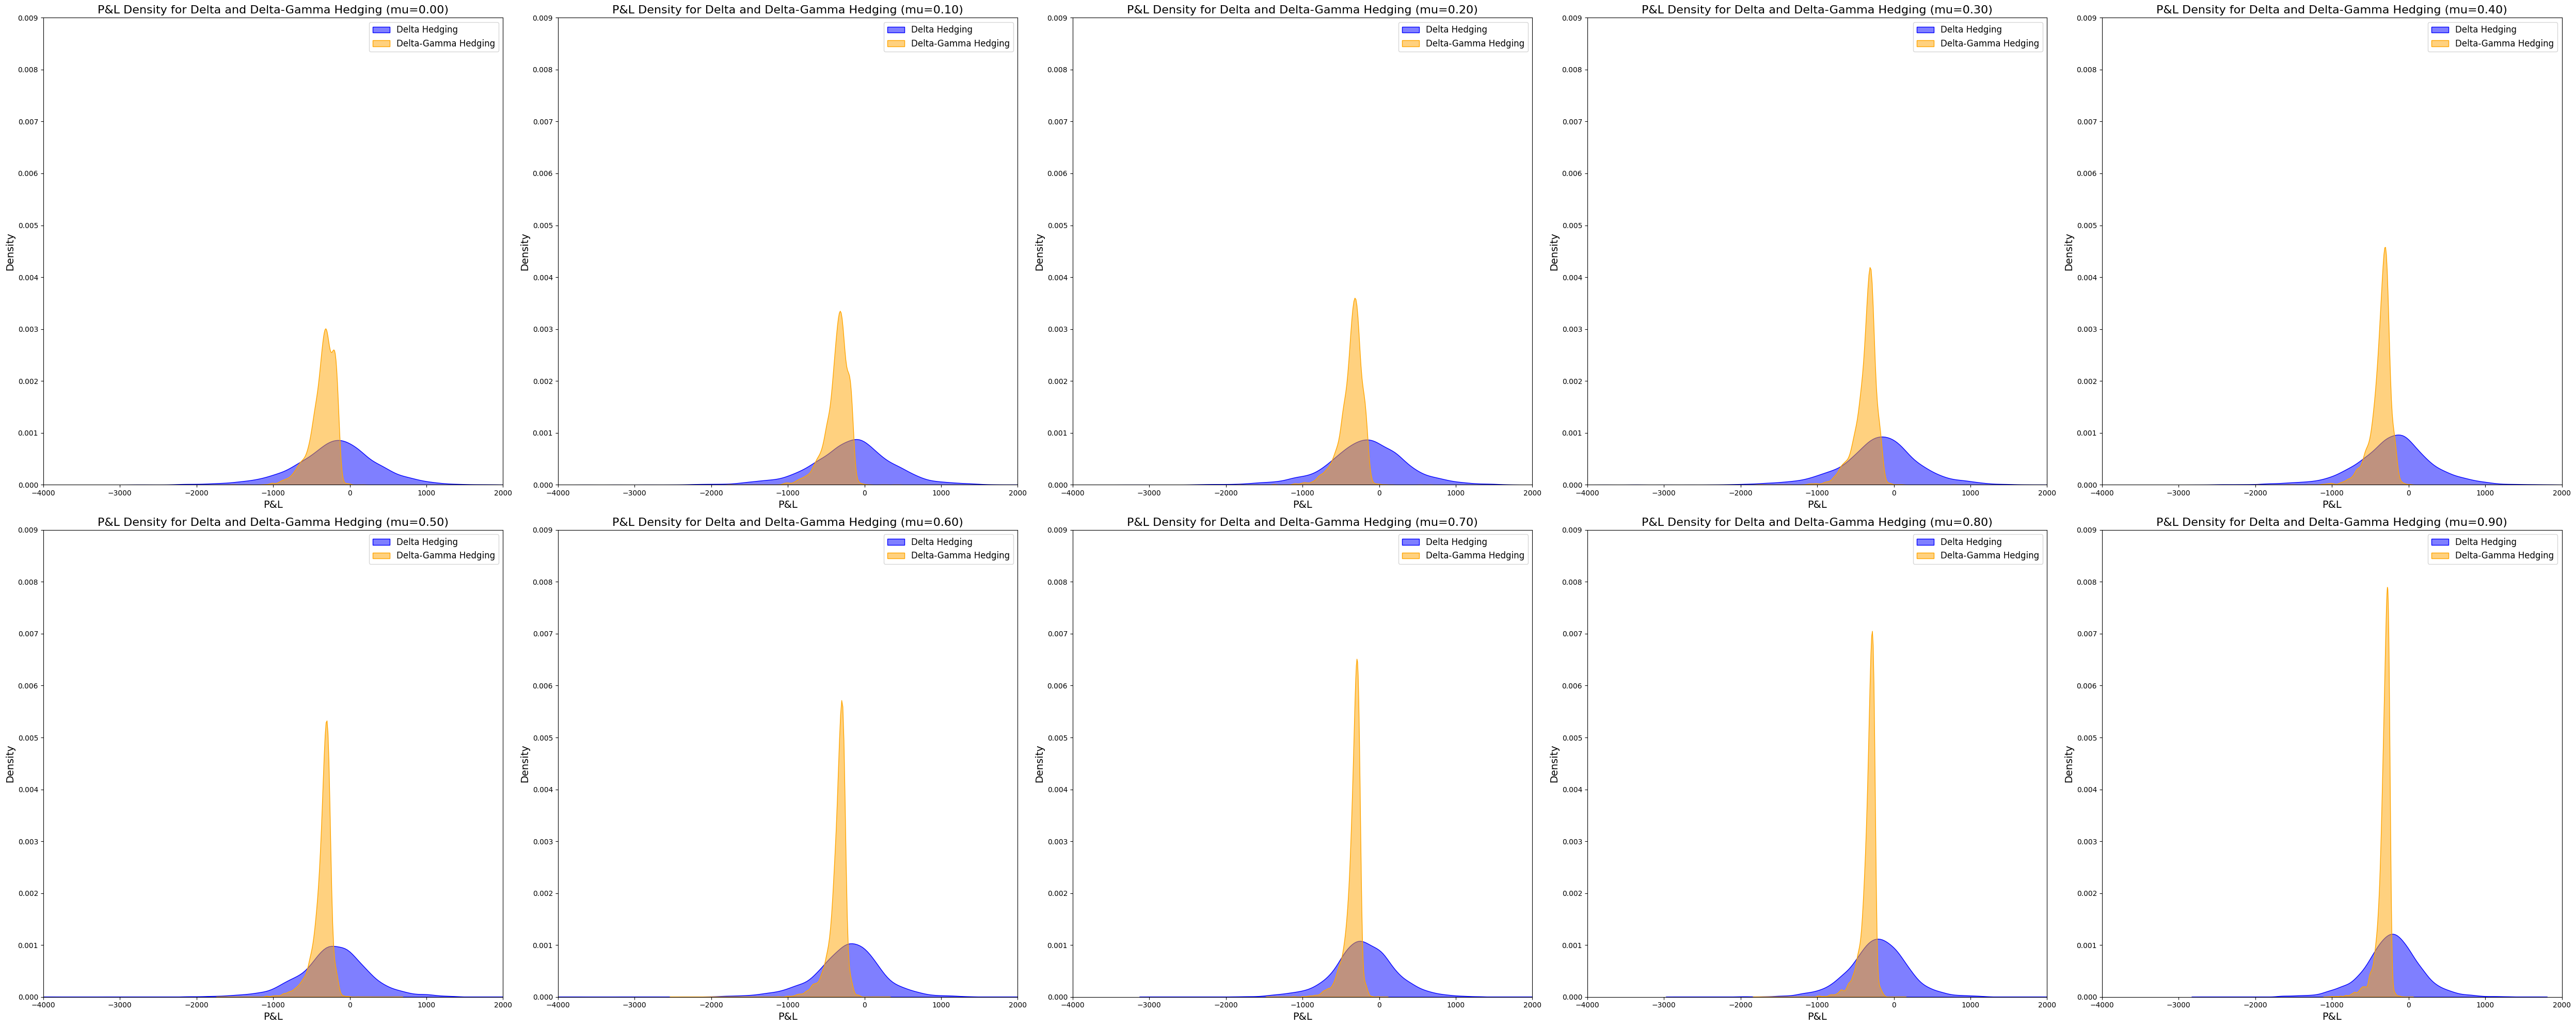

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate the number of rows and columns dynamically
num_plots = len(pnl_results_delta.keys())
ncols = 5
nrows = math.ceil(num_plots / ncols)

plt.figure(figsize=(ncols * 10, nrows * 10))  # Adjust figure size dynamically

for idx, (mu, pnl_delta) in enumerate(pnl_results_delta.items()):
    # Create subplots dynamically based on the grid size
    plt.subplot(nrows, ncols, idx + 1)
    sns.kdeplot(pnl_delta, label="Delta Hedging", color='blue', fill=True, alpha=0.5)
    sns.kdeplot(pnl_results[mu], label="Delta-Gamma Hedging", color='orange', fill=True, alpha=0.5)
    plt.title(f"P&L Density for Delta and Delta-Gamma Hedging (mu={mu:.2f})", fontsize=16)
    plt.xlabel("P&L", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.xlim(-4000, 2000)  # Set x-axis limits
    plt.ylim(0, 0.009)  # Set y-axis limits
    plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


# Question 2
Plot the position you hold in the asset and the hedging option (when Delta-Gamma hedging) for two sample paths – one that ends in the money and one that ends out-of-the money. Set the random number seed so that the asset sample paths when Delta and Delta-Gamma hedging are the same – so you can compare them.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Simulate asset paths
sim_path_df, time_df = simulate_asset_paths(S0, mu_values[1], sigma, T, dt, n_steps, n_paths)

# Identify ITM and OTM paths
final_prices = sim_path_df.iloc[-1, :]
itm_path_idx = final_prices[final_prices > K_g].index[0]  # First ITM path
otm_path_idx = final_prices[final_prices <= K_g].index[0]  # First OTM path


## Delta hedging

In [ ]:
# def delta_hedging_rebalance_new(
#     S, K, T, r, sigma, delta_g, num_g, transaction_cost, return_positions=False
# ):
#     """
#     Delta Hedging: Rebalance portfolio daily using only Delta hedging.
#     Parameters:
#         S: DataFrame of simulated stock prices (n_steps x n_paths).
#         K: Strike price of the g option.
#         T: Time to maturity of the g option (in years).
#         r: Risk-free interest rate.
#         sigma: Volatility of the underlying asset.
#         delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
#         num_g: Number of g options sold.
#         transaction_cost: Cost per unit for stock transactions.
#         return_positions: If True, returns the positions (N_s) alongside the PnL.
#     Returns:
#         pnl: Array of P&L values for each path.
#         (optional) Ns_positions: Array of positions in the asset.
#     """
#     n_steps, n_paths = S.shape
#     dt = 1 / 252  # Daily time step
#     pnl = np.zeros(n_paths)

#     # Initialize list to track positions
#     if return_positions:
#         Ns_positions = np.zeros((n_steps, n_paths))

#     for i in range(n_paths):
#         # Calculate initial value of the g option using BSM
#         S_0 = S.iloc[0, i]
#         g_option_value = bsm_call_price(S_0, K, T, r, sigma)

#         # Initial portfolio setup
#         N_s_0 = int(delta_hedging(delta_g.iloc[0, i], num_g))
#         bank = num_g * g_option_value - N_s_0 * S_0
#         stock_position = N_s_0

#         # Record initial position
#         if return_positions:
#             Ns_positions[0, i] = N_s_0

#         for t in range(1, n_steps - 1):
#             S_t = S.iloc[t - 1, i]
#             S_next = S.iloc[t, i]

#             # Accumulate interest
#             bank *= np.exp(r * dt)

#             # Rebalance
#             N_s_new = int(delta_hedging(delta_g.iloc[t, i], num_g))
#             stock_change = stock_position - N_s_new
#             bank += stock_change * S_next - abs(stock_change) * transaction_cost
#             stock_position = N_s_new

#             # Record positions
#             if return_positions:
#                 Ns_positions[t, i] = stock_position

#         # Final portfolio value
#         final_stock_value = stock_position * S.iloc[-1, i]
#         final_option_payoff = num_g * max(S.iloc[-1, i] - K, 0)  # Option payoff

#         # Accumulate final interest for the bank balance
#         bank *= np.exp(r * dt)

#         pnl[i] = bank + final_stock_value - final_option_payoff

#     if return_positions:
#         return pnl, Ns_positions
#     return pnl


In [ ]:
import numpy as np
import pandas as pd

def delta_hedging_rebalance_new(
    S, K, T, r, sigma, delta_g, num_g, transaction_cost, return_positions=False
):
    """
    Delta Hedging: Rebalance portfolio daily using only Delta hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K: Strike price of the g option.
        T: Time to maturity of the g option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock transactions.
        return_positions: If True, returns the positions (N_s) alongside the PnL.
    Returns:
        pnl: Array of P&L values for each path.
        (optional) Ns_positions: Array of positions in the asset.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step

    # Initialize pnl and positions
    pnl = np.zeros(n_paths)
    if return_positions:
        Ns_positions = np.zeros((n_steps, n_paths))

    # Initial setup for g options
    S_0 = S.iloc[0, :]  # First row of stock prices (S_0)
    g_option_value = bsm_call_price(S_0, K, T, r, sigma)  # Option value for each path
    N_s_0 = np.floor(delta_hedging(delta_g.iloc[0, :].values, num_g)).astype(int)

    # Initial bank value and stock positions
    bank = num_g * g_option_value - N_s_0 * S_0 - np.abs(N_s_0) * transaction_cost
    stock_position = N_s_0

    # Record initial positions
    if return_positions:
        Ns_positions[0, :] = N_s_0

    # Vectorized iteration for each time step t (excluding the first and last time steps)
    for t in range(1, n_steps - 1):
        S_t = S.iloc[t - 1, :]  # Previous time step's stock prices
        S_next = S.iloc[t, :]  # Current time step's stock prices

        # Accumulate interest
        bank *= np.exp(r * dt)

        # Rebalance: Calculate new positions based on delta hedging
        N_s_new = np.floor(delta_hedging(delta_g.iloc[t, :].values, num_g)).astype(int)
        stock_change = stock_position - N_s_new
        bank += stock_change * S_next - np.abs(stock_change) * transaction_cost
        stock_position = N_s_new

        # Record positions
        if return_positions:
            Ns_positions[t, :] = stock_position

    # Final portfolio value
    final_stock_value = stock_position * S.iloc[-1, :]  # Final stock value for each path
    final_option_payoff = num_g * np.maximum(S.iloc[-1, :] - K, 0)  # Option payoff

    # Accumulate final interest for the bank balance
    bank *= np.exp(r * dt)

    # Compute the PnL for each path
    pnl = bank + final_stock_value - final_option_payoff - np.abs(stock_position) * transaction_cost

    if return_positions:
        return pnl, Ns_positions
    return pnl


In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

# Perform Delta Hedging for ITM Path
pnl_itm, Ns_itm = delta_hedging_rebalance_new(
    S=sim_path_df[[itm_path_idx]],  # Single path as DataFrame
    K=K,
    T=T,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[itm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True  # Track positions
)

# Perform Delta Hedging for OTM Path
pnl_otm, Ns_otm = delta_hedging_rebalance_new(
    S=sim_path_df[[otm_path_idx]],  # Single path as DataFrame
    K=K,
    T=T,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[otm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True
)


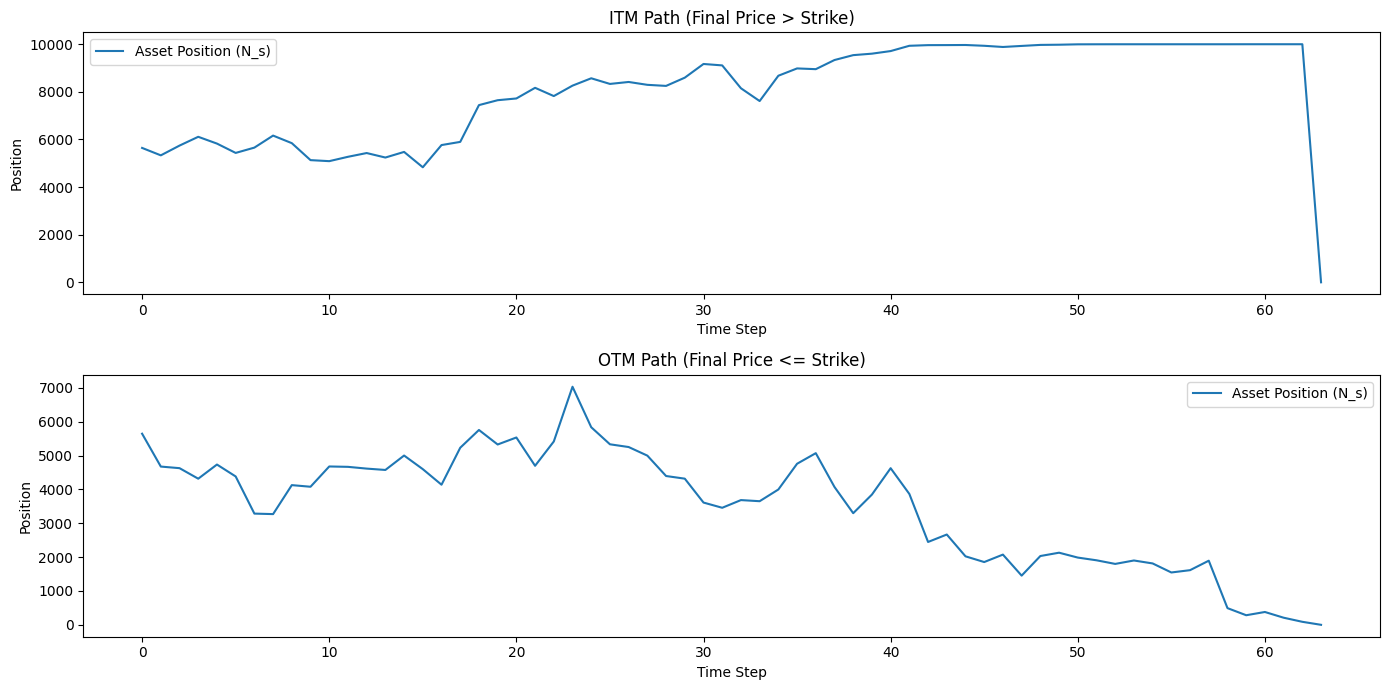

In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

time_steps = np.arange(len(Ns_itm))

plt.figure(figsize=(14, 7))

# ITM Path
plt.subplot(2, 1, 1)
plt.plot(time_steps, Ns_itm, label="Asset Position (N_s)")
plt.title("ITM Path (Final Price > Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

# OTM Path
plt.subplot(2, 1, 2)
plt.plot(time_steps, Ns_otm, label="Asset Position (N_s)")
plt.title("OTM Path (Final Price <= Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Actual Delta-Gamma Hedging positions (replace with actual values)
Ns_itm_delta = Ns_itm  # Delta-Gamma Hedging positions
Ns_otm_delta = Ns_otm  # Delta-Gamma Hedging positions

## Delta gamma hedging

In [ ]:
# def delta_gamma_hedging_rebalance_new(
#     S, K_g, T_g, K_h, T_h, r, sigma, delta_g, gamma_g, gamma_h, delta_h, num_g, transaction_cost, return_positions=False
# ):
#     """
#     Delta-Gamma Hedging: Rebalance portfolio daily using Delta-Gamma hedging.
#     Parameters:
#         S: DataFrame of simulated stock prices (n_steps x n_paths).
#         K_g: Strike price of the g option.
#         T_g: Time to maturity of the g option (in years).
#         K_h: Strike price of the h option.
#         T_h: Time to maturity of the h option (in years).
#         r: Risk-free interest rate.
#         sigma: Volatility of the underlying asset.
#         delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
#         gamma_g: DataFrame of Gamma values for option g (n_steps x n_paths).
#         gamma_h: DataFrame of Gamma values for hedging instrument h (n_steps x n_paths).
#         delta_h: DataFrame of Delta values for hedging instrument h (n_steps x n_paths).
#         num_g: Number of g options sold.
#         transaction_cost: Cost per unit for stock and option transactions.
#         return_positions: If True, returns the positions (N_s and N_h) alongside the PnL.
#     Returns:
#         pnl: Array of P&L values for each path.
#         (optional) Ns_positions, Nh_positions: Arrays of positions in the asset and hedging option.
#     """
#     n_steps, n_paths = S.shape
#     dt = 1 / 252  # Daily time step
#     pnl = np.zeros(n_paths)

#     # Initialize lists to track positions over time
#     if return_positions:
#         Ns_positions = np.zeros((n_steps, n_paths))
#         Nh_positions = np.zeros((n_steps, n_paths))

#     for i in range(n_paths):
#         # Calculate initial value of g and h options using BSM
#         S_0 = S.iloc[0, i]
#         g_option_value = bsm_call_price(S_0, K_g, T_g, r, sigma)
#         h_option_value = bsm_call_price(S_0, K_h, T_h, r, sigma)

#         # Initial portfolio setup
#         N_s_0, N_h_0 = delta_gamma_hedging(
#             delta_g.iloc[0, i], gamma_g.iloc[0, i], gamma_h.iloc[0, i], delta_h.iloc[0, i], num_g
#         )
#         N_s_0 = int(N_s_0)
#         N_h_0 = int(N_h_0)

#         # Record initial positions
#         if return_positions:
#             Ns_positions[0, i] = N_s_0
#             Nh_positions[0, i] = N_h_0

#         # Initial bank value
#         bank = num_g * g_option_value - N_s_0 * S_0 - N_h_0 * h_option_value
#         stock_position = N_s_0
#         hedge_position = N_h_0

#         # Rebalance for all steps except the final one
#         for t in range(1, n_steps - 1):
#             S_t = S.iloc[t - 1, i]
#             S_next = S.iloc[t, i]

#             T_h_t = T_h - t * dt  # Update time to maturity for h option

#             # Recalculate h option value at the new time step
#             h_option_value = bsm_call_price(S_next, K_h, T_h_t, r, sigma)

#             # Accumulate interest
#             bank *= np.exp(r * dt)

#             # Rebalance
#             N_s_new, N_h_new = delta_gamma_hedging(
#                 delta_g.iloc[t, i], gamma_g.iloc[t, i], gamma_h.iloc[t, i], delta_h.iloc[t, i], num_g
#             )
#             N_s_new = int(N_s_new)
#             N_h_new = int(N_h_new)

#             # Update bank for stock transactions
#             stock_change = stock_position - N_s_new
#             bank += stock_change * S_next - abs(stock_change) * transaction_cost
#             stock_position = N_s_new

#             # Update bank for hedging instrument transactions
#             hedge_change = hedge_position - N_h_new
#             bank += hedge_change * h_option_value - abs(hedge_change) * transaction_cost
#             hedge_position = N_h_new

#             # Record positions
#             if return_positions:
#                 Ns_positions[t, i] = stock_position
#                 Nh_positions[t, i] = hedge_position

#         # Final step: Compute portfolio value without rebalancing
#         S_T = S.iloc[-1, i]  # Final stock price
#         final_stock_value = stock_position * S_T
#         T_h_t = T_h - T_g
#         final_h_option_value = hedge_position * bsm_call_price(S_T, K_h, T_h_t, r, sigma)  # value for h option
#         final_option_payoff = num_g * max(S_T - K_g, 0)  # Payoff for g option

#         # Accumulate final interest for the bank balance
#         bank *= np.exp(r * dt)

#         # Compute the total P&L
#         pnl[i] = bank + final_stock_value + final_h_option_value - final_option_payoff

#     if return_positions:
#         return pnl, Ns_positions, Nh_positions
#     return pnl


In [ ]:
import numpy as np
import pandas as pd

def delta_gamma_hedging_rebalance_new(
    S, K_g, T_g, K_h, T_h, r, sigma, delta_g, gamma_g, gamma_h, delta_h, num_g, transaction_cost, return_positions=False
):
    """
    Delta-Gamma Hedging: Rebalance portfolio daily using Delta-Gamma hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K_g: Strike price of the g option.
        T_g: Time to maturity of the g option (in years).
        K_h: Strike price of the h option.
        T_h: Time to maturity of the h option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        gamma_g: DataFrame of Gamma values for option g (n_steps x n_paths).
        gamma_h: DataFrame of Gamma values for hedging instrument h (n_steps x n_paths).
        delta_h: DataFrame of Delta values for hedging instrument h (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock and option transactions.
        return_positions: If True, returns the positions (N_s and N_h) alongside the PnL.
    Returns:
        pnl: Array of P&L values for each path.
        (optional) Ns_positions, Nh_positions: Arrays of positions in the asset and hedging option.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step
    pnl = np.zeros(n_paths)

    # Initialize lists to track positions over time
    if return_positions:
        Ns_positions = np.zeros((n_steps, n_paths))
        Nh_positions = np.zeros((n_steps, n_paths))

    # Initial stock prices and option values
    S_0 = S.iloc[0, :].values  # Vector of initial stock prices for all paths
    g_option_value = bsm_call_price(S_0, K_g, T_g, r, sigma)  # Option value for all paths
    h_option_value = bsm_call_price(S_0, K_h, T_h, r, sigma)  # Option value for all paths

    # Vectorized calculation of initial stock and hedge positions
    N_s_0, N_h_0 = delta_gamma_hedging(
        delta_g.iloc[0, :].values, gamma_g.iloc[0, :].values, gamma_h.iloc[0, :].values, delta_h.iloc[0, :].values, num_g
    )
    N_s_0 = np.floor(N_s_0).astype(int)
    N_h_0 = np.floor(N_h_0).astype(int)

    # Initial bank value and positions
    bank = num_g * g_option_value - N_s_0 * S_0 - N_h_0 * h_option_value - np.abs(N_s_0) * transaction_cost - np.abs(N_h_0) * transaction_cost
    stock_position = N_s_0
    hedge_position = N_h_0

    # Record initial positions
    if return_positions:
        Ns_positions[0, :] = N_s_0
        Nh_positions[0, :] = N_h_0

    # Vectorized iteration for each time step t (excluding the first and last time steps)
    for t in range(1, n_steps - 1):
        S_t = S.iloc[t - 1, :].values  # Previous time step's stock prices
        S_next = S.iloc[t, :].values  # Current time step's stock prices

        # Update time to maturity for h option
        T_h_t = T_h - t * dt  # Vectorized update for time to maturity

        # Recalculate h option value at the new time step
        h_option_value = bsm_call_price(S_next, K_h, T_h_t, r, sigma)

        # Accumulate interest
        bank *= np.exp(r * dt)

        # Vectorized Rebalance: Calculate new positions based on delta-gamma hedging
        N_s_new, N_h_new = delta_gamma_hedging(
            delta_g.iloc[t, :].values, gamma_g.iloc[t, :].values, gamma_h.iloc[t, :].values, delta_h.iloc[t, :].values, num_g
        )
        N_s_new = np.floor(N_s_new).astype(int)
        N_h_new = np.floor(N_h_new).astype(int)

        # Update bank for stock transactions
        stock_change = stock_position - N_s_new
        bank += stock_change * S_next - np.abs(stock_change) * transaction_cost
        stock_position = N_s_new

        # Update bank for hedging instrument transactions
        hedge_change = hedge_position - N_h_new
        bank += hedge_change * h_option_value - np.abs(hedge_change) * transaction_cost
        hedge_position = N_h_new

        # Record positions
        if return_positions:
            Ns_positions[t, :] = stock_position
            Nh_positions[t, :] = hedge_position

    # Final step: Compute portfolio value without rebalancing
    S_T = S.iloc[-1, :].values  # Final stock prices
    final_stock_value = stock_position * S_T
    T_h_t = T_h - T_g
    final_h_option_value = hedge_position * bsm_call_price(S_T, K_h, T_h_t, r, sigma)  # Value for h option
    final_option_payoff = num_g * np.maximum(S_T - K_g, 0)  # Payoff for g option

    # Accumulate final interest for the bank balance
    bank *= np.exp(r * dt)

    # Compute the total P&L for each path
    pnl = bank + final_stock_value + final_h_option_value - final_option_payoff - np.abs(stock_position) * transaction_cost - np.abs(hedge_position) * transaction_cost

    if return_positions:
        return pnl, Ns_positions, Nh_positions
    return pnl


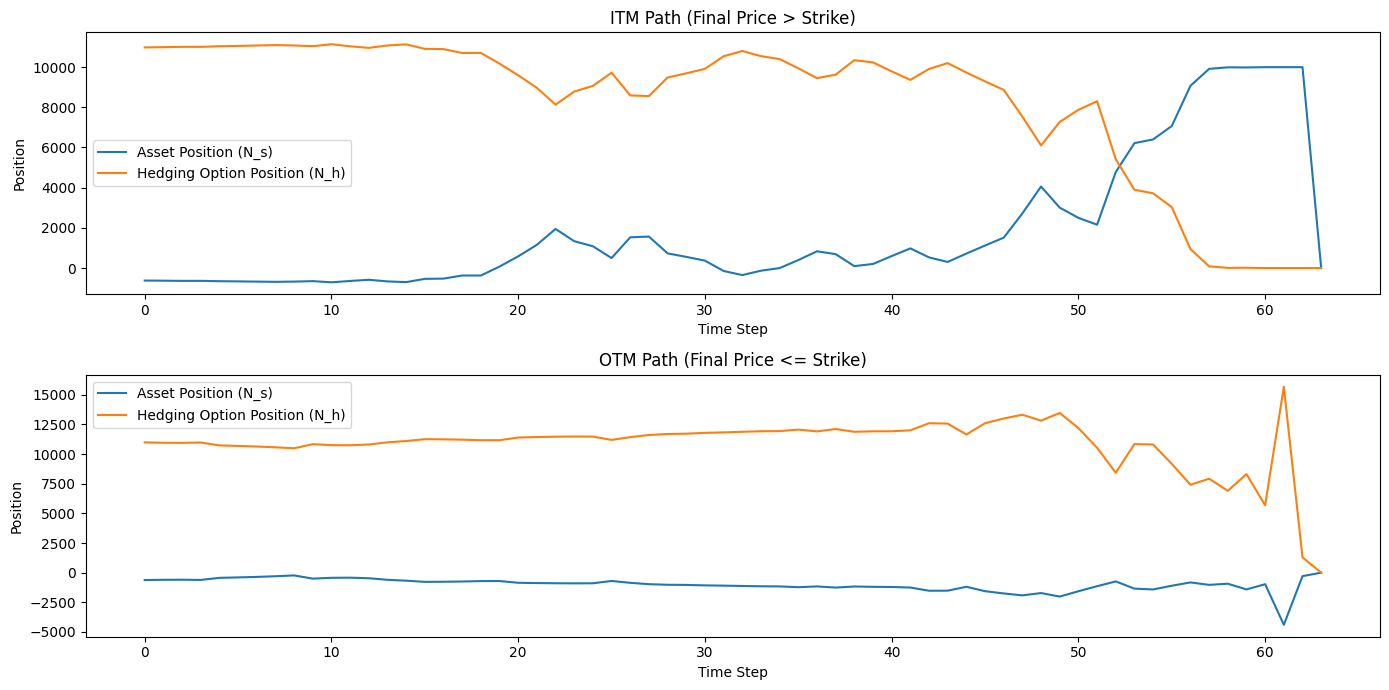

In [ ]:
# Set random seed for reproducibility
np.random.seed(0)
# Compute deltas and gammas
T_vec_g = time_df["Time to Maturity"]
T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)

T_vec_h = T_h - np.arange(n_steps + 1) * dt
T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))
T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)

deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K_g, r, sigma)
deltas_h = black_scholes_delta(sim_path_df, T_vec_h, K_h, r, sigma)

gammas_g = black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, sigma)
gammas_h = black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, sigma)

# Perform Delta-Gamma Hedging for ITM Path
pnl_itm, Ns_itm, Nh_itm = delta_gamma_hedging_rebalance_new(
    S=sim_path_df[[itm_path_idx]],  # Keep as DataFrame with shape (n_steps, 1)
    K_g=K_g,
    T_g=T_g,
    K_h=K_h,
    T_h=T_h,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[itm_path_idx]],
    gamma_g=gammas_g[[itm_path_idx]],
    gamma_h=gammas_h[[itm_path_idx]],
    delta_h=deltas_h[[itm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True  # Track positions
)

# Perform Delta-Gamma Hedging for OTM Path
pnl_otm, Ns_otm, Nh_otm = delta_gamma_hedging_rebalance_new(
    S=sim_path_df[[otm_path_idx]],
    K_g=K_g,
    T_g=T_g,
    K_h=K_h,
    T_h=T_h,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[otm_path_idx]],
    gamma_g=gammas_g[[otm_path_idx]],
    gamma_h=gammas_h[[otm_path_idx]],
    delta_h=deltas_h[[otm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True
)

# Plot Results
time_steps = np.arange(len(Ns_itm))

plt.figure(figsize=(14, 7))

# ITM Path
plt.subplot(2, 1, 1)
plt.plot(time_steps, Ns_itm, label="Asset Position (N_s)")
plt.plot(time_steps, Nh_itm, label="Hedging Option Position (N_h)")
plt.title("ITM Path (Final Price > Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

# OTM Path
plt.subplot(2, 1, 2)
plt.plot(time_steps, Ns_otm, label="Asset Position (N_s)")
plt.plot(time_steps, Nh_otm, label="Hedging Option Position (N_h)")
plt.title("OTM Path (Final Price <= Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

plt.tight_layout()
plt.show()


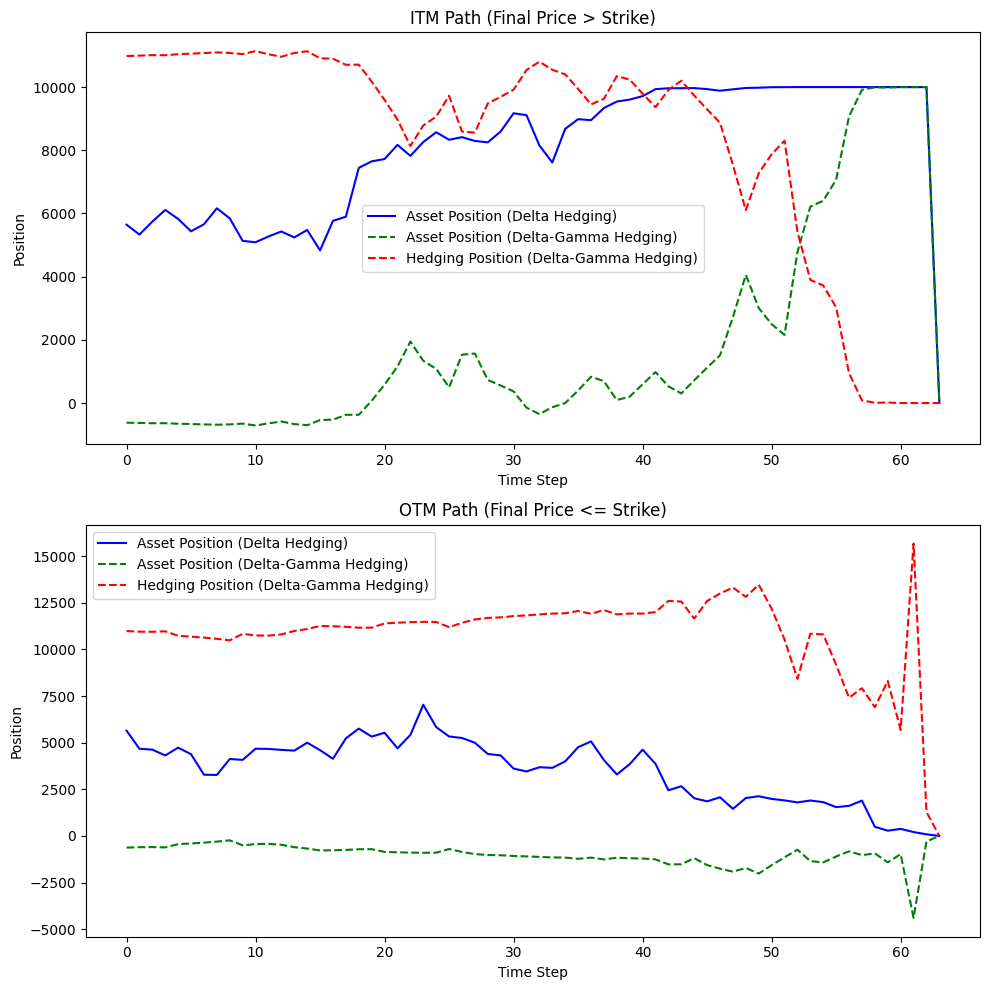

In [ ]:
Ns_itm_gamma = Ns_itm  # Delta-Gamma Hedging positions for ITM
Nh_itm_gamma = Nh_itm  # Hedging positions for ITM (Delta-Gamma)
Ns_otm_gamma = Ns_otm  # Delta-Gamma Hedging positions for OTM
Nh_otm_gamma = Nh_otm  # Hedging positions for OTM (Delta-Gamma)

# Create the plot
plt.figure(figsize=(10, 10))

# ITM Path (Delta vs Delta-Gamma Hedging)
plt.subplot(2, 1, 1)
plt.plot(time_steps, Ns_itm_delta, label="Asset Position (Delta Hedging)", color='blue')
plt.plot(time_steps, Ns_itm_gamma, label="Asset Position (Delta-Gamma Hedging)", color='green', linestyle='--')
plt.plot(time_steps, Nh_itm_gamma, label="Hedging Position (Delta-Gamma Hedging)", color='red', linestyle='--')
plt.title("ITM Path (Final Price > Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

# OTM Path (Delta vs Delta-Gamma Hedging)
plt.subplot(2, 1, 2)
plt.plot(time_steps, Ns_otm_delta, label="Asset Position (Delta Hedging)", color='blue')
plt.plot(time_steps, Ns_otm_gamma, label="Asset Position (Delta-Gamma Hedging)", color='green', linestyle='--')
plt.plot(time_steps, Nh_otm_gamma, label="Hedging Position (Delta-Gamma Hedging)", color='red', linestyle='--')
plt.title("OTM Path (Final Price <= Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Question 3
Suppose that the real-world P volatility is σ ∈ {20%, 22%, . . . , 30%}, but you still sold the option using σ = 25%, and hedge assuming that volatility is 25%. Compare again, the Delta and Delta-Gamma hedging cases.

In [ ]:
import matplotlib.pyplot as plt

# Define real-world volatilities
real_volatilities = [0.20, 0.22, 0.24, 0.26, 0.28, 0.30]

# Store results for Delta and Delta-Gamma hedging
delta_pnl_results = {}
delta_gamma_pnl_results = {}

for sigma_real in real_volatilities:
    # Simulate asset paths with real-world volatility
    sim_path_df, time_df = simulate_asset_paths(S0, mu_values[1], sigma_real, T, dt, n_steps, n_paths)

    # Create T_vec_g and T_vec_h
    T_vec_g = time_df["Time to Maturity"]
    T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)
    T_vec_h = T_h - np.arange(n_steps + 1) * dt
    T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))
    T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)

    # Compute deltas and gammas (using assumed sigma = 25%)
    deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K_g, r, 0.25)
    deltas_h = black_scholes_delta(sim_path_df, T_vec_h, K_h, r, 0.25)
    gammas_g = black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, 0.25)
    gammas_h = black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, 0.25)

    # Perform Delta hedging
    delta_pnl = delta_hedging_rebalance(
        S=sim_path_df,
        K=K_g,
        T=T_g,
        r=r,
        sigma=0.25,  # Assumed sigma
        delta_g=deltas_g,
        num_g=num_g,
        transaction_cost=transaction_cost
    )
    delta_pnl_results[sigma_real] = delta_pnl

    # Perform Delta-Gamma hedging
    delta_gamma_pnl = delta_gamma_hedging_rebalance(
        S=sim_path_df,
        K_g=K_g,
        T_g=T_g,
        K_h=K_h,
        T_h=T_h,
        r=r,
        sigma=0.25,  # Assumed sigma
        delta_g=deltas_g,
        gamma_g=gammas_g,
        gamma_h=gammas_h,
        delta_h=deltas_h,
        num_g=num_g,
        transaction_cost=transaction_cost
    )
    delta_gamma_pnl_results[sigma_real] = delta_gamma_pnl


In [ ]:
# import matplotlib.pyplot as plt

# # Plot Delta PnL distributions for each real-world volatility
# plt.figure(figsize=(12, 6))
# for sigma_real in real_volatilities:
#     plt.hist(delta_pnl_results[sigma_real], bins=50, alpha=0.6, label=f"Delta (σ={sigma_real:.2f})")
# plt.xlabel("P&L")
# plt.ylabel("Frequency")
# plt.title("P&L Distributions for Delta Hedging Across Real-World Volatilities")
# plt.legend()
# plt.show()

# # Plot Delta-Gamma PnL distributions for each real-world volatility
# plt.figure(figsize=(12, 6))
# for sigma_real in real_volatilities:
#     plt.hist(delta_gamma_pnl_results[sigma_real], bins=50, alpha=0.6, label=f"Delta-Gamma (σ={sigma_real:.2f})")
# plt.xlabel("P&L")
# plt.ylabel("Frequency")
# plt.title("P&L Distributions for Delta-Gamma Hedging Across Real-World Volatilities")
# plt.legend()
# plt.show()


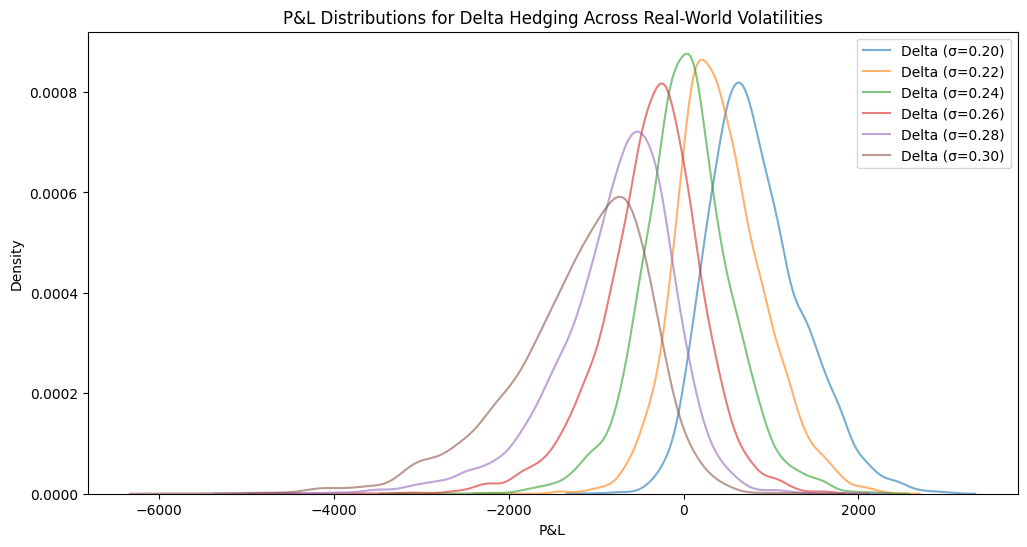

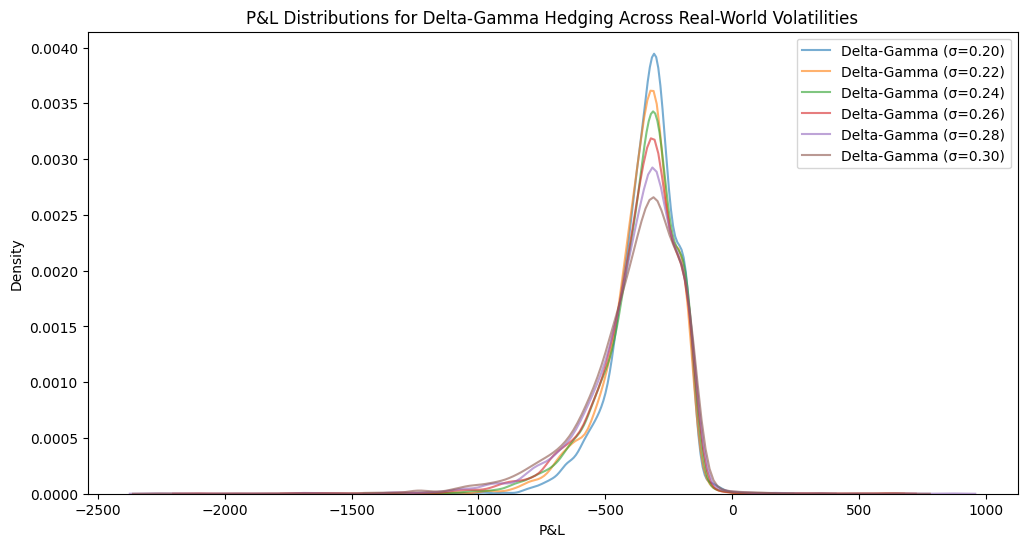

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Delta PnL distributions for each real-world volatility
plt.figure(figsize=(12, 6))
for sigma_real in real_volatilities:
    # Use seaborn's kdeplot for density estimation
    sns.kdeplot(delta_pnl_results[sigma_real], label=f"Delta (σ={sigma_real:.2f})", fill=False, alpha=0.6)
plt.xlabel("P&L")
plt.ylabel("Density")
plt.title("P&L Distributions for Delta Hedging Across Real-World Volatilities")
plt.legend()
plt.show()

# Plot Delta-Gamma PnL distributions for each real-world volatility
plt.figure(figsize=(12, 6))
for sigma_real in real_volatilities:
    # Use seaborn's kdeplot for density estimation
    sns.kdeplot(delta_gamma_pnl_results[sigma_real], label=f"Delta-Gamma (σ={sigma_real:.2f})", fill=False, alpha=0.6)
plt.xlabel("P&L")
plt.ylabel("Density")
plt.title("P&L Distributions for Delta-Gamma Hedging Across Real-World Volatilities")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Compute summary statistics for Delta and Delta-Gamma hedging
summary_stats = []

for sigma_real in real_volatilities:
    delta_mean = delta_pnl_results[sigma_real].mean()
    delta_var = delta_pnl_results[sigma_real].var()
    delta_skew = skew(delta_pnl_results[sigma_real])
    delta_kurtosis = kurtosis(delta_pnl_results[sigma_real])

    delta_gamma_mean = delta_gamma_pnl_results[sigma_real].mean()
    delta_gamma_var = delta_gamma_pnl_results[sigma_real].var()
    delta_gamma_skew = skew(delta_gamma_pnl_results[sigma_real])
    delta_gamma_kurtosis = kurtosis(delta_gamma_pnl_results[sigma_real])


    summary_stats.append({
        "Volatility": sigma_real,
        "Delta Mean": delta_mean,
        "Delta Variance": delta_var,
        "Delta Skewness": delta_skew,
        "Delta Kurtosis": delta_kurtosis,
        "Delta-Gamma Mean": delta_gamma_mean,
        "Delta-Gamma Variance": delta_gamma_var,
        "Delta-Gamma Skewness": delta_gamma_skew,
        "Delta-Gamma Kurtosis": delta_gamma_kurtosis
    })

# Convert to DataFrame for display
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Volatility,Delta Mean,Delta Variance,Delta Skewness,Delta Kurtosis,Delta-Gamma Mean,Delta-Gamma Variance,Delta-Gamma Skewness,Delta-Gamma Kurtosis
0,0.20,823.843451,284023.523312,0.568566,0.383084,-340.333351,15335.093763,-0.927994,2.099486
1,0.22,415.421534,251586.439174,0.326527,0.574572,-357.145997,19778.032451,-1.157720,3.812041
2,0.24,25.738745,279704.507708,-0.044260,1.439493,-360.523338,23180.138487,-1.302924,3.032132
3,0.26,-374.002586,335220.258377,-0.611760,2.035460,-371.383145,29211.160481,-1.763375,7.662506
4,0.28,-780.624227,468867.831844,-1.044175,2.502560,-377.859527,33513.257819,-1.677032,7.172569
5,0.30,-1188.334801,652995.169910,-0.983632,1.559957,-387.388141,39750.130327,-1.677501,6.553173


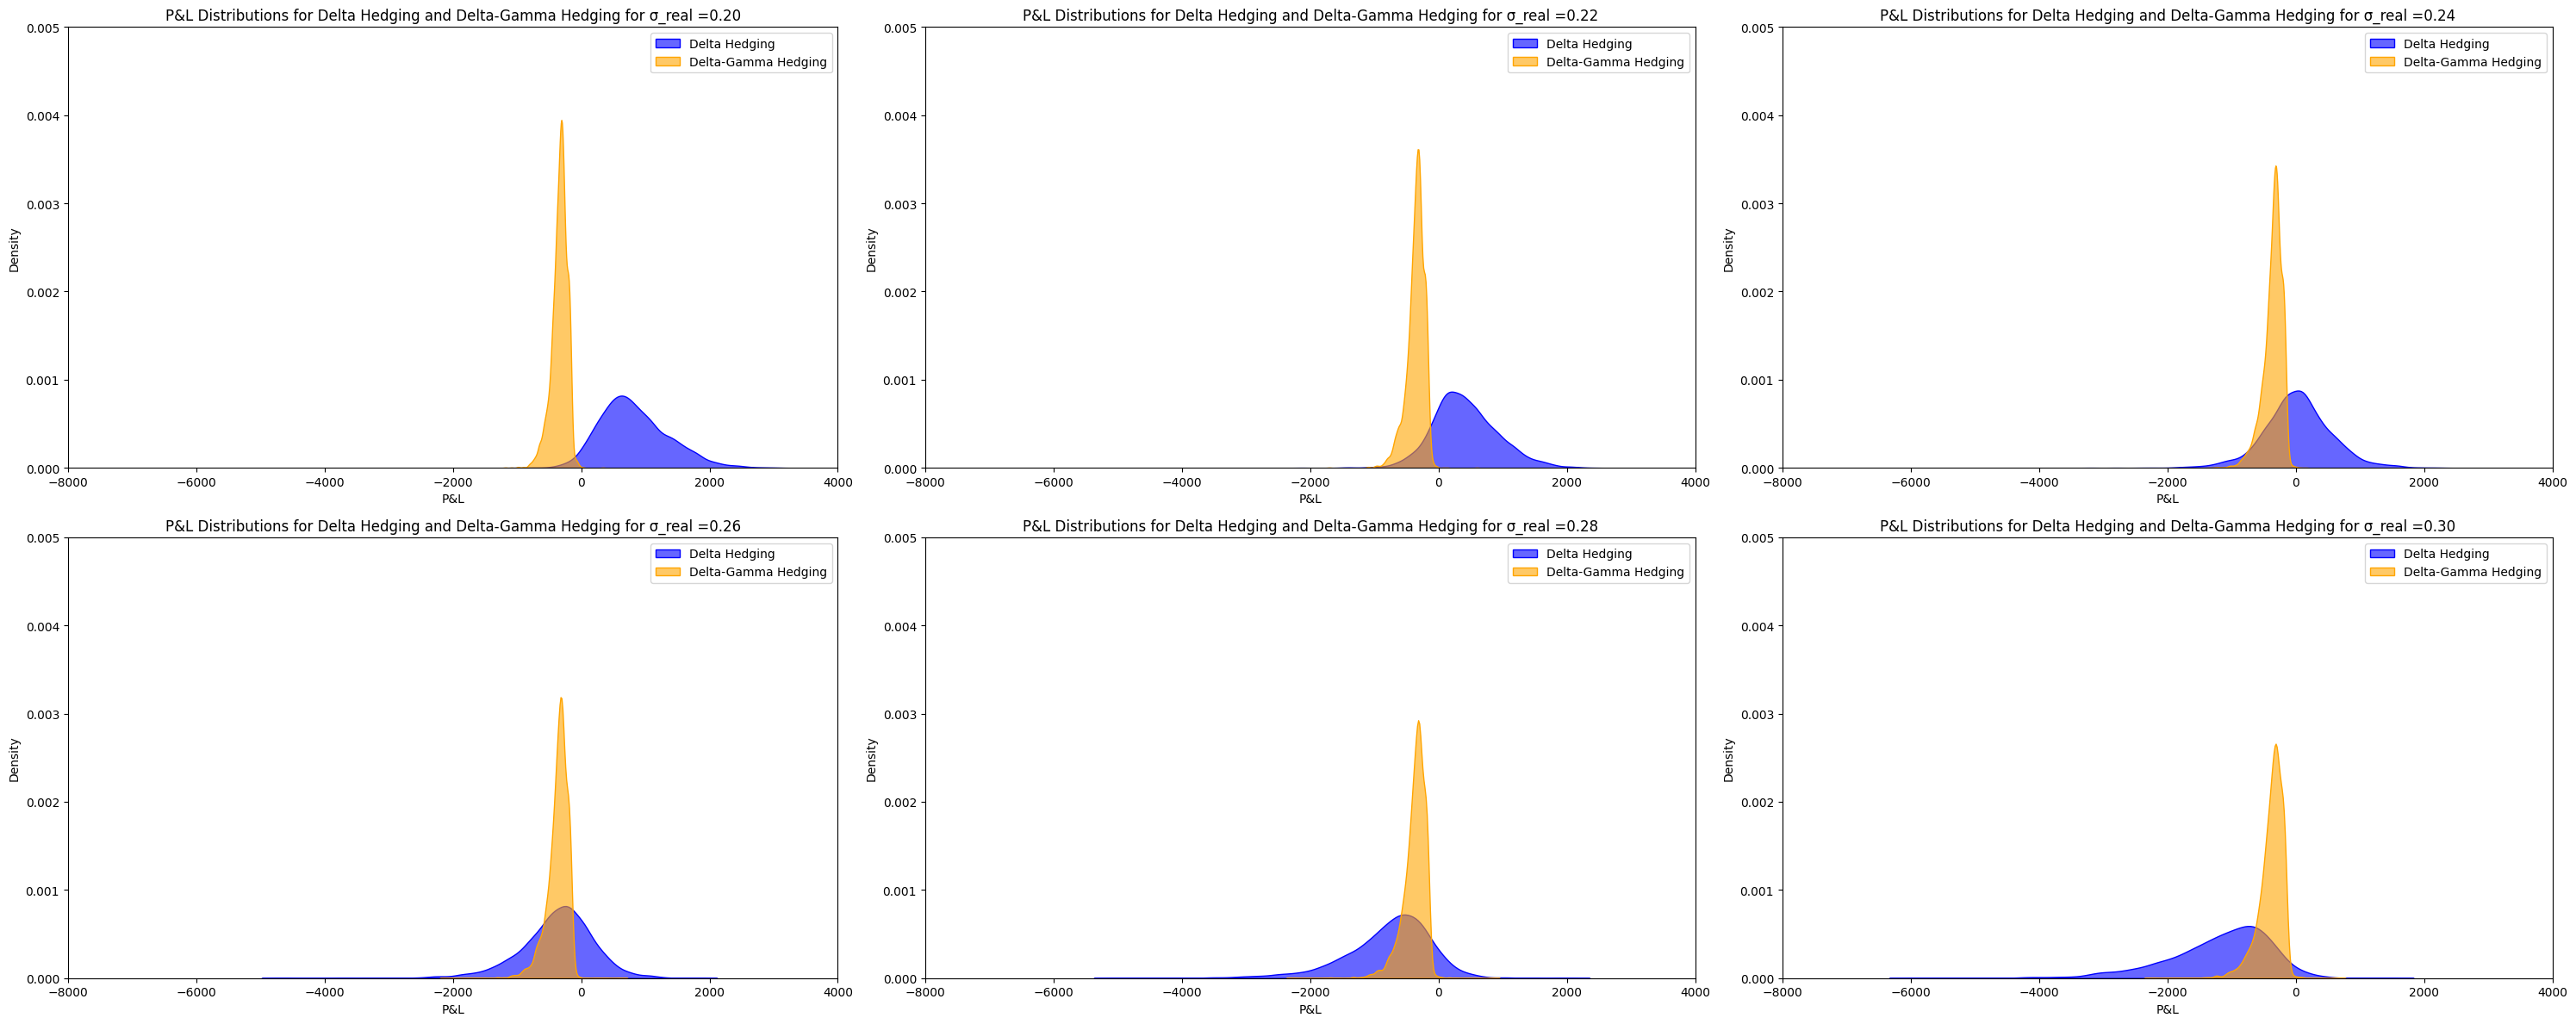

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define fixed x and y axis limits
x_limits = (-8000, 4000)
y_limits = (0, 0.005)

# Create a subplot for each sigma_real (2 rows, 3 columns)
plt.figure(figsize=(30, 12))  # Adjust figure size for 2x3 grid

for idx, sigma_real in enumerate(real_volatilities):
    # Calculate row and column index for 2x3 grid
    row = idx // 3
    col = idx % 3

    plt.subplot(2, 3, idx + 1)  # Create subplots in a 2x3 grid

    # Plot density for Delta Hedging
    sns.kdeplot(delta_pnl_results[sigma_real], label="Delta Hedging", color='blue', fill=True, alpha=0.6)

    # Plot density for Delta-Gamma Hedging
    sns.kdeplot(delta_gamma_pnl_results[sigma_real], label="Delta-Gamma Hedging", color='orange', fill=True, alpha=0.6)

    plt.title(f"P&L Distributions for Delta Hedging and Delta-Gamma Hedging for σ_real ={sigma_real:.2f}")
    plt.xlabel("P&L")
    plt.ylabel("Density")
    plt.xlim(x_limits)  # Set x-axis limits
    plt.ylim(y_limits)  # Set y-axis limits
    plt.legend()

plt.tight_layout()
plt.show()
